# Team 4 Project

## Fraudulent vs. Non-Fraudulent Job Postings

#### Mahalakshmi Jayapal
#### Yi Wang
#### Jonathan Yoon

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv("/Users/yhjnthn/Documents/USD_MS-ADS/ADS502/fake_job_postings.csv")
dt.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
dt.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

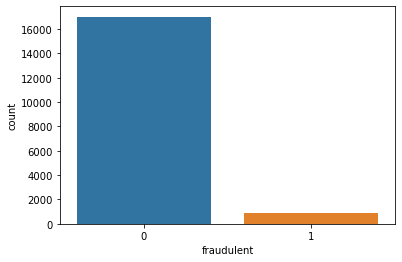

In [6]:
sns.countplot(dt.fraudulent)

In [7]:
import matplotlib.pyplot as plt

In [8]:
crosstab_01 = pd.crosstab(dt['employment_type'], dt['fraudulent'])
crosstab_01

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
Other,212,15
Part-time,723,74
Temporary,239,2


<AxesSubplot:xlabel='employment_type'>

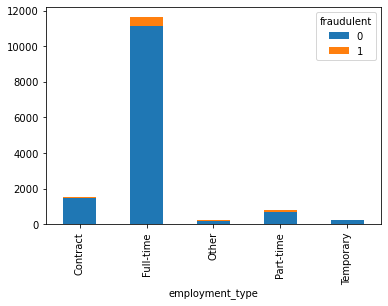

In [9]:
crosstab_01.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='employment_type'>

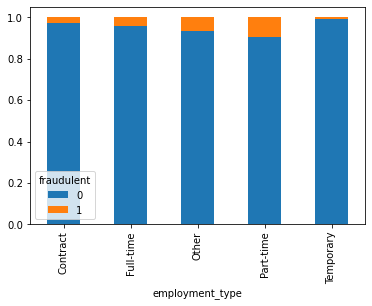

In [10]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(axis=1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [11]:
dt.location = dt.location.fillna('blank')

In [12]:
loc_split = []
for loc in dt.location:
    loc_split.append(loc.split(','))

In [13]:
dt_US = dt[dt['location'].str.contains("US")]
dt_US.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [14]:
loc_split =[]
for loc in dt_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [15]:
dt_US = dt_US.join(loc_split)
dt_US.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,DC,Washington
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,FL,Fort Worth
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,MD,
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,CA,San Francisco


In [16]:
dt_US.isnull().sum()

job_id                    0
title                     0
location                  0
department             7618
salary_range           9099
company_profile        2076
description               0
requirements           1774
benefits               4682
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1762
required_experience    4284
required_education     4477
industry               2682
function               3904
fraudulent                0
state                  4475
city                   4475
dtype: int64

In [17]:
dt_US.employment_type = dt_US.employment_type.fillna('Other')

In [18]:
dt_US.required_experience = dt_US.required_experience.fillna('Unspecified')

In [19]:
dt_US.required_education = dt_US.required_education.fillna('Not Applicable')

In [20]:
dt_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 17877
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               10656 non-null  int64 
 1   title                10656 non-null  object
 2   location             10656 non-null  object
 3   department           3038 non-null   object
 4   salary_range         1557 non-null   object
 5   company_profile      8580 non-null   object
 6   description          10656 non-null  object
 7   requirements         8882 non-null   object
 8   benefits             5974 non-null   object
 9   telecommuting        10656 non-null  int64 
 10  has_company_logo     10656 non-null  int64 
 11  has_questions        10656 non-null  int64 
 12  employment_type      10656 non-null  object
 13  required_experience  10656 non-null  object
 14  required_education   10656 non-null  object
 15  industry             7974 non-null   object
 16  func

In [21]:
dt_US.isnull().sum()

job_id                    0
title                     0
location                  0
department             7618
salary_range           9099
company_profile        2076
description               0
requirements           1774
benefits               4682
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry               2682
function               3904
fraudulent                0
state                  4475
city                   4475
dtype: int64

In [22]:
dt_US.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,Not Applicable,NaN,Marketing,0,NY,New York
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,Other,Unspecified,Not Applicable,NaN,NaN,0,DC,Washington
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,FL,Fort Worth
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,MD,
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,Other,Unspecified,Not Applicable,NaN,NaN,0,CA,San Francisco
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Other,Unspecified,Not Applicable,NaN,NaN,0,AZ,Phoenix
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,Not Applicable,Information Technology and Services,NaN,0,NJ,Jersey City
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,CT,Stamford
10,11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,FL,Orlando
12,13,"Applications Developer, Digital","US, CT, Stamford",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...","The Applications Developer, Digital will devel...",Requirements:4 – 5 years’ experience in develo...,NaN,0,1,0,Full-time,Associate,Bachelor's Degree,Management Consulting,Information Technology,0,PA,USA Northeast


<AxesSubplot:xlabel='employment_type', ylabel='count'>

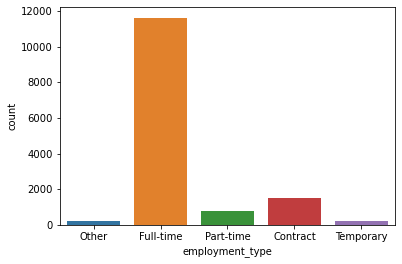

In [23]:
sns.countplot(x = dt['employment_type'], data=dt)

In [24]:
crosstab_02 = pd.crosstab(dt['employment_type'], dt['fraudulent'])
crosstab_02

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
Other,212,15
Part-time,723,74
Temporary,239,2


<AxesSubplot:xlabel='employment_type'>

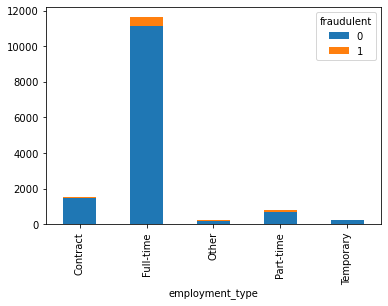

In [25]:
crosstab_02.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='employment_type'>

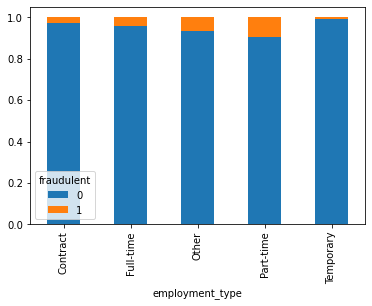

In [26]:
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(axis=1), axis = 0)
crosstab_norm2.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_experience'>

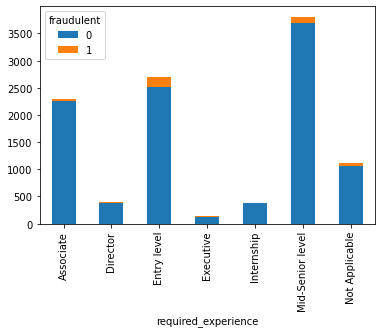

In [27]:
crosstab_03 = pd.crosstab(dt['required_experience'], dt['fraudulent'])
crosstab_03.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_experience'>

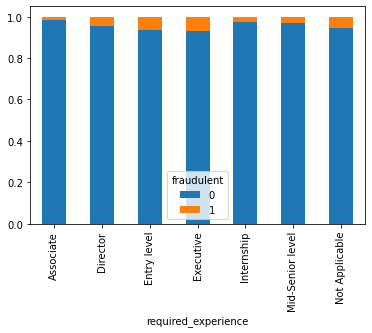

In [28]:
crosstab_norm3 = crosstab_03.div(crosstab_03.sum(axis=1), axis = 0)
crosstab_norm3.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_education'>

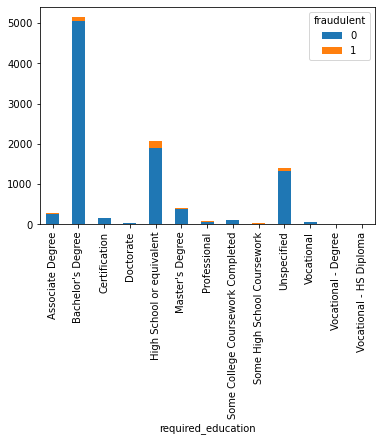

In [29]:
crosstab_04 = pd.crosstab(dt['required_education'], dt['fraudulent'])
crosstab_04.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_education'>

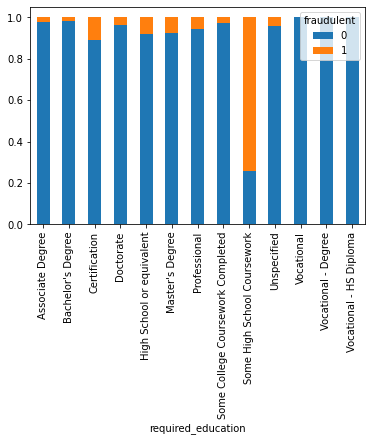

In [30]:
crosstab_norm4 = crosstab_04.div(crosstab_04.sum(axis=1), axis = 0)
crosstab_norm4.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='has_company_logo'>

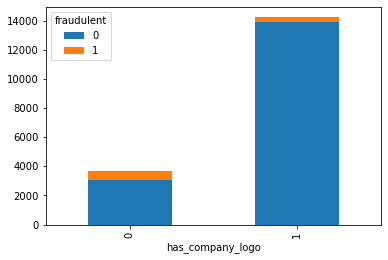

In [31]:
crosstab_05 = pd.crosstab(dt['has_company_logo'], dt['fraudulent'])
crosstab_05.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='has_company_logo'>

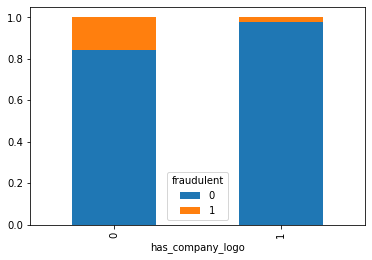

In [32]:
crosstab_norm5 = crosstab_05.div(crosstab_05.sum(axis=1), axis = 0)
crosstab_norm5.plot(kind='bar', stacked = True)

In [33]:
dt1 = dt_US[['state','employment_type','required_experience','required_education','has_company_logo','fraudulent']]
dt1.head()

,state,employment_type,required_experience,required_education,has_company_logo,fraudulent
0,NY,Other,Internship,Not Applicable,1,0
2,DC,Other,Unspecified,Not Applicable,1,0
3,FL,Full-time,Mid-Senior level,Bachelor's Degree,1,0
4,MD,Full-time,Mid-Senior level,Bachelor's Degree,1,0
5,CA,Other,Unspecified,Not Applicable,0,0


In [34]:
dt1.isnull().sum()

state                  4475
employment_type           0
required_experience       0
required_education        0
has_company_logo          0
fraudulent                0
dtype: int64

In [35]:
dt1.dropna(axis = 0, how = 'any', thresh=None, inplace = True)
dt1.isnull().sum()

<ipython-input-35-7690883c95e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1.dropna(axis = 0, how = 'any', thresh=None, inplace = True)


state                  0
employment_type        0
required_experience    0
required_education     0
has_company_logo       0
fraudulent             0
dtype: int64

In [36]:
dt1.head()

,state,employment_type,required_experience,required_education,has_company_logo,fraudulent
0,NY,Other,Internship,Not Applicable,1,0
2,DC,Other,Unspecified,Not Applicable,1,0
3,FL,Full-time,Mid-Senior level,Bachelor's Degree,1,0
4,MD,Full-time,Mid-Senior level,Bachelor's Degree,1,0
5,CA,Other,Unspecified,Not Applicable,0,0


In [37]:
dt1.shape

(6181, 6)

In [38]:
dt1["state"] = dt1["state"].astype('category')
dt1.dtypes

<ipython-input-38-d1446782e9c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["state"] = dt1["state"].astype('category')


state                  category
employment_type          object
required_experience      object
required_education       object
has_company_logo          int64
fraudulent                int64
dtype: object

In [39]:
dt1["state"] = dt1["state"].cat.codes
dt1.head()

<ipython-input-39-8c2e79cac793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["state"] = dt1["state"].cat.codes


,state,employment_type,required_experience,required_education,has_company_logo,fraudulent
0,35,Other,Internship,Not Applicable,1,0
2,8,Other,Unspecified,Not Applicable,1,0
3,10,Full-time,Mid-Senior level,Bachelor's Degree,1,0
4,21,Full-time,Mid-Senior level,Bachelor's Degree,1,0
5,5,Other,Unspecified,Not Applicable,0,0


In [40]:
dt1["employment_type"] = dt1["employment_type"].astype('category')
dt1.dtypes

<ipython-input-40-16b821cea983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["employment_type"] = dt1["employment_type"].astype('category')


state                      int8
employment_type        category
required_experience      object
required_education       object
has_company_logo          int64
fraudulent                int64
dtype: object

In [41]:
dt1["employment_type"]=dt1["employment_type"].cat.codes
dt1.head()

<ipython-input-41-12554b510d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["employment_type"]=dt1["employment_type"].cat.codes


,state,employment_type,required_experience,required_education,has_company_logo,fraudulent
0,35,2,Internship,Not Applicable,1,0
2,8,2,Unspecified,Not Applicable,1,0
3,10,1,Mid-Senior level,Bachelor's Degree,1,0
4,21,1,Mid-Senior level,Bachelor's Degree,1,0
5,5,2,Unspecified,Not Applicable,0,0


In [42]:
dt1["required_experience"] = dt1["required_experience"].astype('category')
dt1["required_education"] = dt1["required_education"].astype('category')

<ipython-input-42-aa52d7689cfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["required_experience"] = dt1["required_experience"].astype('category')
<ipython-input-42-aa52d7689cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["required_education"] = dt1["required_education"].astype('category')


In [43]:
dt1["required_experience"] = dt1["required_experience"].cat.codes
dt1["required_education"] = dt1["required_education"].cat.codes
dt1.head()

<ipython-input-43-48d1119e045a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["required_experience"] = dt1["required_experience"].cat.codes
<ipython-input-43-48d1119e045a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["required_education"] = dt1["required_education"].cat.codes


,state,employment_type,required_experience,required_education,has_company_logo,fraudulent
0,35,2,4,6,1,0
2,8,2,7,6,1,0
3,10,1,5,1,1,0
4,21,1,5,1,1,0
5,5,2,7,6,0,0


### Partition of Data Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
fr_train, fr_test = train_test_split(dt1,
                                    test_size = 0.25,
                                    random_state = 20)

In [46]:
fr_train['fraudulent'].value_counts()

0    4319
1     316
Name: fraudulent, dtype: int64

In [47]:
train_ratio = fr_train['fraudulent'].value_counts()[1] / fr_train.shape[0] * 100
train_ratio

6.817691477885653

In [48]:
orig_ratio = dt1['fraudulent'].value_counts()[1] / dt1['fraudulent'].shape[0] * 100
orig_ratio

6.503801973790649

In [49]:
X_train = fr_train[["state", "employment_type", "required_experience", "required_education", "has_company_logo"]]
Y_train = fr_train[["fraudulent"]]
X_train.head()

,state,employment_type,required_experience,required_education,has_company_logo
1907,39,1,5,6,1
436,25,0,7,1,1
3914,5,1,0,6,1
8030,44,1,0,1,1
2732,44,2,7,6,0


### Naïve Bayes Model

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
nb = MultinomialNB().fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [52]:
X_test = fr_test[["state", "employment_type", "required_experience", "required_education", "has_company_logo"]]
Y_test = fr_test[["fraudulent"]]
X_test.head()

,state,employment_type,required_experience,required_education,has_company_logo
5242,44,1,5,6,1
5764,5,1,5,6,1
3574,17,0,2,1,1
8829,11,1,7,6,1
394,0,1,5,1,1


In [53]:
predictions = nb.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
Y_pred = pd.DataFrame(predictions, columns=['fraudulent'])
Y_pred

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
1541,0
1542,0
1543,0
1544,0


In [55]:
Y_test

,fraudulent
5242,0
5764,0
3574,0
8829,0
394,0
...,...
2536,0
54,0
5060,0
5553,0


In [56]:
Y_pred.value_counts()

fraudulent
0             1546
dtype: int64

In [57]:
Y_test.value_counts()

fraudulent
0             1460
1               86
dtype: int64

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [59]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("TNR:",metrics.precision_score(Y_test, Y_pred))
print("NPV:",metrics.recall_score(Y_test, Y_pred))

Confusion Matrix
[[1460    0]
 [  86    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1460
           1       0.00      0.00      0.00        86

    accuracy                           0.94      1546
   macro avg       0.47      0.50      0.49      1546
weighted avg       0.89      0.94      0.92      1546

Accuracy: 0.944372574385511
TNR: 0.0
NPV: 0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
cm1 = confusion_matrix(Y_test, Y_pred)
cm1

array([[1460,    0],
       [  86,    0]])

In [61]:
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.944372574385511
Sensitivity :  1.0
Specificity :  0.0


### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, Y_train)
DTCPred = DTC.predict(X_test)

In [64]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, DTCPred))
print('Classification Report')
print(classification_report(Y_test, DTCPred))
print("Accuracy:",metrics.accuracy_score(Y_test, DTCPred))
print("TNR:",metrics.precision_score(Y_test, DTCPred))
print("NPV:",metrics.recall_score(Y_test, DTCPred))

Confusion Matrix
[[1441   19]
 [  81    5]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1460
           1       0.21      0.06      0.09        86

    accuracy                           0.94      1546
   macro avg       0.58      0.52      0.53      1546
weighted avg       0.91      0.94      0.92      1546

Accuracy: 0.9353169469598965
TNR: 0.20833333333333334
NPV: 0.05813953488372093


In [65]:
cm2 = confusion_matrix(Y_test, DTCPred)
cm2

array([[1441,   19],
       [  81,    5]])

In [66]:
total2=sum(sum(cm2))
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Accuracy :  0.9353169469598965
Sensitivity :  0.986986301369863
Specificity :  0.05813953488372093


### K-Nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)
KNNPred= KNN.predict(X_test)

<ipython-input-68-d56a07515903>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN.fit(X_train, Y_train)


In [69]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, KNNPred))
print('Classification Report')
print(classification_report(Y_test, KNNPred))
print("Accuracy:",metrics.accuracy_score(Y_test, KNNPred))
print("TNR:",metrics.precision_score(Y_test, KNNPred))
print("NPV:",metrics.recall_score(Y_test, KNNPred))

Confusion Matrix
[[1397   63]
 [  77    9]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1460
           1       0.12      0.10      0.11        86

    accuracy                           0.91      1546
   macro avg       0.54      0.53      0.53      1546
weighted avg       0.90      0.91      0.91      1546

Accuracy: 0.9094437257438551
TNR: 0.125
NPV: 0.10465116279069768


In [70]:
cm3 = confusion_matrix(Y_test, KNNPred)
cm3

array([[1397,   63],
       [  77,    9]])

In [71]:
total3=sum(sum(cm3))
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity3)

Accuracy :  0.9094437257438551
Sensitivity :  0.9568493150684931
Specificity :  0.10465116279069768


### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
RFPred=RF.predict(X_test)

<ipython-input-73-2c7811ee9488>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, Y_train)


In [74]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, RFPred))
print('Classification Report')
print(classification_report(Y_test, RFPred))
print("Accuracy:",metrics.accuracy_score(Y_test, RFPred))
print("TNR:",metrics.precision_score(Y_test, RFPred))
print("NPV:",metrics.recall_score(Y_test, RFPred))

Confusion Matrix
[[1448   12]
 [  83    3]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1460
           1       0.20      0.03      0.06        86

    accuracy                           0.94      1546
   macro avg       0.57      0.51      0.51      1546
weighted avg       0.90      0.94      0.92      1546

Accuracy: 0.9385510996119016
TNR: 0.2
NPV: 0.03488372093023256


In [75]:
cm4 = confusion_matrix(Y_test, RFPred)
cm4

array([[1448,   12],
       [  83,    3]])

In [76]:
total4=sum(sum(cm4))
accuracy4=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy4)

sensitivity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity4)

Accuracy :  0.9385510996119016
Sensitivity :  0.9917808219178083
Specificity :  0.03488372093023256


### Logistic Regression

In [77]:
import statsmodels.api as sm

In [78]:
X_train = sm.add_constant(X_train)

In [79]:
logreg01 = sm.Logit(Y_train, X_train).fit()
logreg01.summary()

Optimization terminated successfully.
         Current function value: 0.230671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraudulent   No. Observations:                 4635
Model:                          Logit   Df Residuals:                     4629
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                 0.07323
Time:                        20:10:44   Log-Likelihood:                -1069.2
converged:                       True   LL-Null:                       -1153.6
Covariance Type:            nonrobust   LLR p-value:                 1.217e-34
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0286      0.213     -9.523      0.000      -2.446      -1.611
state                   0.0022      0.004      0.597      0.551      -0.005       0.010
employment_type         0.0316      0.082      0.385      0.700      -0.129       0.192
required_experience     0.0057      0.024      0.234      0.815      -0.042       0.053
required_education      0.0491      0.023      2.113      0.035       0.004       0.095
has_company_logo       -1.4796      0.123    -12.004      0.000      -1.721      -1.238
=======================================================================================
"""

In [80]:
X_test = sm.add_constant(X_test)

In [81]:
LG_pred = (logreg01.predict(X_test) > 0.5).astype(int)

In [82]:
print('Confusion Matrix')
print(confusion_matrix(Y_test, LG_pred))
print('Classification Report')
print(classification_report(Y_test, LG_pred))
print("Accuracy:",metrics.accuracy_score(Y_test, LG_pred))
print("TNR:",metrics.precision_score(Y_test, LG_pred))
print("NPV:",metrics.recall_score(Y_test, LG_pred))

Confusion Matrix
[[1460    0]
 [  86    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1460
           1       0.00      0.00      0.00        86

    accuracy                           0.94      1546
   macro avg       0.47      0.50      0.49      1546
weighted avg       0.89      0.94      0.92      1546

Accuracy: 0.944372574385511
TNR: 0.0
NPV: 0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
cm5 = confusion_matrix(Y_test, LG_pred)
cm5

array([[1460,    0],
       [  86,    0]])

In [84]:
total5=sum(sum(cm5))
accuracy5=(cm5[0,0]+cm5[1,1])/total5
print ('Accuracy : ', accuracy5)

sensitivity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity5 )

specificity5 = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity5)

Accuracy :  0.944372574385511
Sensitivity :  1.0
Specificity :  0.0
